# Image-Based Steganography Using LSB Encoding

## Defining the Encoding Function

In [11]:
from PIL import Image

def encode_message(image_path, output_path, message):
    # Open image
    img = Image.open(image_path)
    encoded = img.copy()
    width, height = img.size
    message += chr(0)  # Null-terminator to mark the end

    binary_message = ''.join([format(ord(char), '08b') for char in message])
    data_index = 0

    for y in range(height):
        for x in range(width):
            pixel = list(img.getpixel((x, y)))
            for i in range(3):  # RGB
                if data_index < len(binary_message):
                    pixel[i] = pixel[i] & ~1 | int(binary_message[data_index])
                    data_index += 1
            encoded.putpixel((x, y), tuple(pixel))

            if data_index >= len(binary_message):
                break
        if data_index >= len(binary_message):
            break

    encoded.save(output_path)
    print("Message encoded and saved to", output_path)


In [12]:
# Hide message
encode_message(r"C:\Users\UseR\Desktop\campus.png", "encoded_image.png", "Class at 10:30. This is a secret Message!")

Message encoded and saved to encoded_image.png


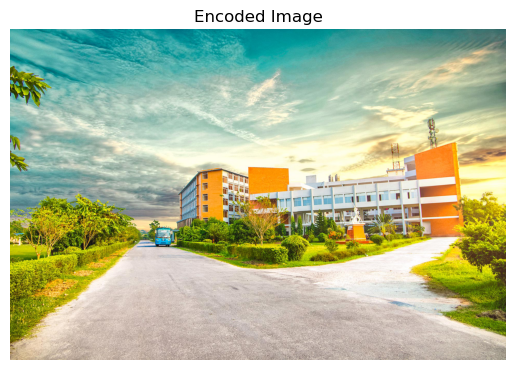

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display image
img = mpimg.imread("encoded_image.png")
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Encoded Image")
plt.show()


# Defining the Decoding Function

In [14]:
def decode_message(image_path):
    img = Image.open(image_path)
    width, height = img.size
    binary_data = ""
    
    for y in range(height):
        for x in range(width):
            pixel = img.getpixel((x, y))
            for i in range(3):  # RGB
                binary_data += str(pixel[i] & 1)

    chars = [chr(int(binary_data[i:i+8], 2)) for i in range(0, len(binary_data), 8)]
    message = ''.join(chars).split(chr(0), 1)[0]  # Stop at null-terminator
    return message

In [15]:
# Retrieve message
secret = decode_message("encoded_image.png")
print("Decoded message:", secret)

Decoded message: Class at 10:30. This is a secret Message!
